<h2>SINDy Example<h2>

**Sparse Identification of a Geared DC Motor Nonlinear Dynamics**

* To install PySINDy package, go to:
https://github.com/dynamicslab/pysindy

In [1]:
# import packages
import numpy as np
from numpy.random import seed
# setting the seed
seed(10)
import pandas as pd
import pysindy as ps
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [14]:
# data
exp_data_tr = pd.read_csv('C:/Users/Samual/OneDrive - aucegypt.edu/Documents/PYTHON/Neural Networks and ML- Geared DC Motor Case Study/DC_Motor_experimental_data_training.csv')
exp_data_tr.columns = ['time', 'voltage','speed']

t_tr=exp_data_tr["time"]
t_tr=np.array(t_tr)

v_tr=exp_data_tr["voltage"]
v_tr=np.array(v_tr)

theta_tr=exp_data_tr["speed"]
theta_tr=np.array(theta_tr)

theta_v_tr = np.stack((theta_tr,v_tr), axis=-1)  # First column is theta, second is v
print(theta_v_tr.shape)


# Testind/Validation Data
exp_data_ts = pd.read_csv('C:/Users/Samual/OneDrive - aucegypt.edu/Documents/PYTHON/Neural Networks and ML- Geared DC Motor Case Study/DC_Motor_experimental_data_testing.csv')

exp_data_ts.columns = ['time', 'voltage','speed']

t_ts=exp_data_ts["time"]
t_ts=np.array(t_ts)

v_ts=exp_data_ts["voltage"]
v_ts=np.array(v_ts)

theta_ts=exp_data_ts["speed"]
theta_ts=np.array(theta_ts)


theta_v_ts = np.stack((theta_ts,v_ts), axis=-1)  # First column is theta, second is v
print(theta_v_ts.shape)



(25000, 2)
(25000, 2)


In [15]:
ssr_optimizer = ps.SSR(alpha=.1,max_iter=20, criteria="model_residual",verbose=True ) # Stepwise sparse regression (SSR)
lasso_optimizer = Lasso(alpha=0.1, max_iter=200, fit_intercept=False)
stlsq_optimizer = ps.STLSQ(threshold=0.1) # Didn't work well at all
sr3_optimizer = ps.SR3(threshold=0.1, thresholder='l1')
frols_optimizer = ps.FROLS(alpha=.005) # Forward Regression Orthogonal Least Squares (FROLS) 


differentiation_method = ps.FiniteDifference(order=2)
feature_names =["theta", "v"]
feature_library = ps.PolynomialLibrary(degree=3)
model1 = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=ssr_optimizer,
    feature_names=["theta", "v"]
)

from time import time
# Start timer
t0 = time()
model1.fit(x=theta_tr, t=t_tr,u=v_tr,quiet=True)
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))

 Iteration ... |y - Xw|^2 ...  a * |w|_2 ...      |w|_0 ...  b * |w|_0 ... Total: |y-Xw|^2+a*|w|_2+b*|w|_0
         0 ... 3.1753e+06 ... 5.8052e+02 ...          9 ... 0.0000e+00 ... 3.1759e+06
         1 ... 3.1759e+06 ... 7.0446e+02 ...          8 ... 0.0000e+00 ... 3.1766e+06
         2 ... 3.1760e+06 ... 6.9798e+02 ...          7 ... 0.0000e+00 ... 3.1766e+06
         3 ... 3.1927e+06 ... 1.9030e+03 ...          6 ... 0.0000e+00 ... 3.1946e+06
         4 ... 3.2091e+06 ... 1.4826e+03 ...          5 ... 0.0000e+00 ... 3.2106e+06
         5 ... 3.2938e+06 ... 5.9579e+02 ...          4 ... 0.0000e+00 ... 3.2944e+06
         6 ... 3.4630e+06 ... 4.2350e+01 ...          3 ... 0.0000e+00 ... 3.4630e+06
         7 ... 3.4962e+06 ... 2.2460e-04 ...          2 ... 0.0000e+00 ... 3.4962e+06
         8 ... 3.5137e+06 ... 4.5180e-07 ...          1 ... 0.0000e+00 ... 3.5137e+06

Computation time: 1.3568105697631836 seconds


In [17]:
# Print the discovered model
model1.print()

(theta)' = -89.838 1 + -0.484 theta + 4.598 v + 0.007 theta^2 + -0.036 theta v + 0.010 v^2


In [18]:
# Predict derivatives using the learned model
x_dot_pre1 = model1.predict(x=theta_ts,u=v_ts) 
x_pre1=model1.simulate(x0=[0],u=v_ts, t=t_ts)
print(x_pre1.shape)
# Compute derivatives with a finite difference method, for comparison
x__dot_com1= model1.differentiate(theta_ts, 0.02)

C:\Users\Samual\Anaconda3\envs\deep_env2\lib\site-packages\pysindy\pysindy.py:1083: UserWarning: Last time point dropped in simulation because interpolation of control input was used. To avoid this, pass in a callable for u.
  "Last time point dropped in simulation because "


(24999, 1)


In [19]:
ssr_optimizer = ps.SSR(alpha=.1,max_iter=20, criteria="model_residual",verbose=True ) # Stepwise sparse regression (SSR)
lasso_optimizer = Lasso(alpha=0.1, max_iter=200, fit_intercept=False)
stlsq_optimizer = ps.STLSQ(threshold=0.1) # Didn't work well at all
sr3_optimizer = ps.SR3(threshold=0.1, thresholder='l1')
frols_optimizer = ps.FROLS(alpha=.005) # Forward Regression Orthogonal Least Squares (FROLS) 


differentiation_method = ps.FiniteDifference(order=2)
feature_names =["theta", "v"]
feature_library = ps.PolynomialLibrary(degree=3)
model2 = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=lasso_optimizer,
    feature_names=["theta", "v"]
)

from time import time
# Start timer
t0 = time()
model2.fit(x=theta_tr, t=t_tr,u=v_tr,quiet=True)
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))


Computation time: 0.20913457870483398 seconds


In [20]:
# Print the discovered model
model2.print()

(theta)' = -1.734 theta + 3.174 v + 0.012 theta^2 + -0.014 theta v + -0.007 v^2


In [21]:
# Predict derivatives using the learned model
x_dot_pre2 = model2.predict(x=theta_ts,u=v_ts) 
x_pre2=model2.simulate(x0=[0],u=v_ts, t=t_ts)
print(x_pre2.shape)
# Compute derivatives with a finite difference method, for comparison
x__dot_com2= model2.differentiate(theta_ts, 0.02)

C:\Users\Samual\Anaconda3\envs\deep_env2\lib\site-packages\pysindy\pysindy.py:1083: UserWarning: Last time point dropped in simulation because interpolation of control input was used. To avoid this, pass in a callable for u.
  "Last time point dropped in simulation because "


(24999, 1)


In [23]:
ssr_optimizer = ps.SSR(alpha=.1,max_iter=20, criteria="model_residual",verbose=True ) # Stepwise sparse regression (SSR)
lasso_optimizer = Lasso(alpha=0.1, max_iter=200, fit_intercept=False)
stlsq_optimizer = ps.STLSQ(threshold=0.1) # Didn't work well at all
sr3_optimizer = ps.SR3(threshold=0.1, thresholder='l1')
frols_optimizer = ps.FROLS(alpha=.005) # Forward Regression Orthogonal Least Squares (FROLS) 


differentiation_method = ps.FiniteDifference(order=2)
feature_names =["theta", "v"]
feature_library = ps.PolynomialLibrary(degree=3)
model3 = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=frols_optimizer,
    feature_names=["theta", "v"]
)

from time import time
# Start timer
t0 = time()
model3.fit(x=theta_tr, t=t_tr,u=v_tr,quiet=True)
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))


Computation time: 0.14261651039123535 seconds


In [24]:
# Print the discovered model
model3.print()

(theta)' = -85.430 1 + -0.687 theta + 4.800 v + 0.006 theta^2 + -0.029 theta v


In [25]:
# Predict derivatives using the learned model
x_dot_pre3 = model3.predict(x=theta_ts,u=v_ts) 
x_pre3=model3.simulate(x0=[0],u=v_ts, t=t_ts)
print(x_pre3.shape)
# Compute derivatives with a finite difference method, for comparison
x__dot_com3= model3.differentiate(theta_ts, 0.02)

C:\Users\Samual\Anaconda3\envs\deep_env2\lib\site-packages\pysindy\pysindy.py:1083: UserWarning: Last time point dropped in simulation because interpolation of control input was used. To avoid this, pass in a callable for u.
  "Last time point dropped in simulation because "


(24999, 1)


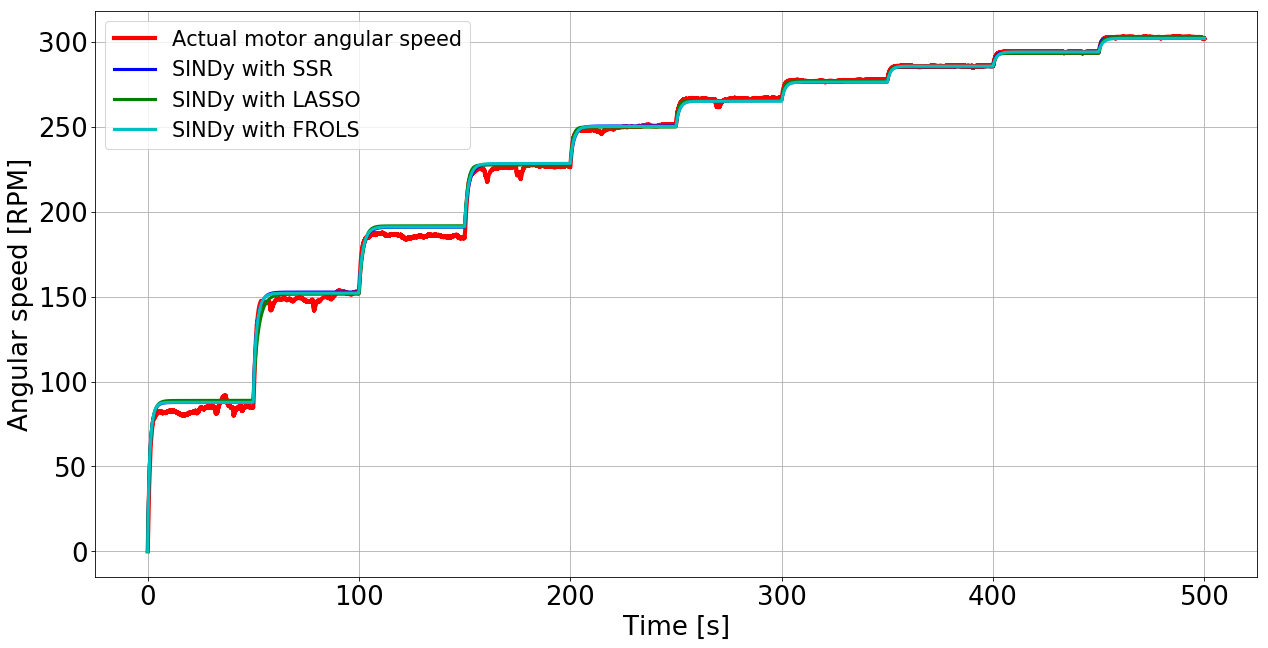

In [13]:
# Plotting the Models
from matplotlib.pyplot import figure
fig=plt.figure(figsize=(20,10),dpi=75)
plt.rcParams.update ({"font.size":25})
plt.plot(t_ts[1:25000],theta_ts[1:25000], color='r',linewidth=4,label="Actual motor angular speed")
plt.plot(t_ts[1:25000,],x_pre1, color='b',linewidth=3,label="SINDy with SSR")
plt.plot(t_ts[1:25000,],x_pre2, color='g',linewidth=3,label="SINDy with LASSO")
plt.plot(t_ts[1:25000,],x_pre3, color='c',linewidth=3,label="SINDy with FROLS ")
plt.ylabel('$\dot{\psi}_{os}(t)$ [rpm]',fontsize=25)
plt.xlabel('t [s]',fontsize=25)
#plt.title('The Angular Speed Prediction of Different Geared DC Motor SINDy Models',fontsize=25)
plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.show()
fig.savefig("SINDy models.png") 

